### Example: 1

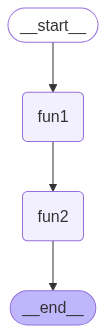

[fun1]: input - Bhagwat
[fun1]: output - Bhagwat from fun1
[fun2]: input - Bhagwat from fun1
[fun2]: output - Bhagwat from fun1 Chate from fun2


'Bhagwat from fun1 Chate from fun2'

In [67]:
from langgraph.graph import Graph
from IPython.display import Image, display

def fun1(input1):
    print(f'[fun1]: input - {input1}')
    result = input1 + ' from fun1'
    print(f'[fun1]: output - {result}')
    return result

def fun2(input2):
    print(f'[fun2]: input - {input2}')
    result = input2 + ' Chate from fun2'
    print(f'[fun2]: output - {result}')
    return result

graph = Graph()

graph.add_node('fun1', fun1)
graph.add_node('fun2', fun2)

graph.add_edge('fun1', 'fun2')

graph.set_entry_point('fun1')
graph.set_finish_point('fun2')

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

app.invoke('Bhagwat')

## Example 2

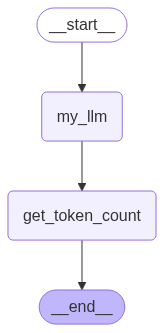

[my_llm] Input: TATA enterprise
[my_llm] Output: Tata Enterprises is a massive Indian multinational conglomerate headquartered in Mumbai, Maharashtra.  It's not a single entity, but a group of over 100 independent operating companies, collectively known as Tata companies.  These companies operate in a diverse range of sectors, including:

* **Automotive:** Tata Motors (cars, trucks, buses), Jaguar Land Rover
* **Steel:** Tata Steel
* **Information Technology:** Tata Consultancy Services (TCS), Tata Elxsi
* **Consumer Goods:** Tata Consumer Products (tea, coffee, salt, etc.), Titan Company (watches, jewellery), BigBasket (online grocery)
* **Chemicals:** Tata Chemicals
* **Power:** Tata Power
* **Telecommunications:** Tata Teleservices (though significantly reduced in scale)
* **Hospitality:** Taj Hotels Resorts and Palaces, Indian Hotels Company
* **Aerospace & Defence:** Tata Advanced Systems

**Key Characteristics of Tata Enterprises:**

* **Size and Scale:** One of the largest and o

In [68]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import Image, display

os.environ['GOOGLE_API_KEY'] = os.getenv('GOOGLE_API_KEY')

llm = ChatGoogleGenerativeAI(model='gemini-1.5-flash')

def my_llm(topic: str) -> str:
    print(f"[my_llm] Input: {topic}")
    res = llm.invoke(topic)
    print(f"[my_llm] Output: {res.content}")
    return res.content

def get_token_count(input_txt: str) -> str:
    print(f"[get_token_count] Input: {input_txt}")
    length = len(input_txt.split())
    output = f"total tokens in the text: {length}"
    print(f"[get_token_count] Output: {output}")
    return output

pipeline = Graph()

pipeline.add_node('my_llm', my_llm)
pipeline.add_node('get_token_count', get_token_count)

pipeline.add_edge('my_llm', 'get_token_count')

pipeline.set_entry_point('my_llm')
pipeline.set_finish_point('get_token_count')

app = pipeline.compile()

display(Image(app.get_graph().draw_mermaid_png()))

res = app.invoke('TATA enterprise')
print(res)

In [69]:
for output in app.stream("tell me about the tata enterpirse in detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

[my_llm] Input: tell me about the tata enterpirse in detail.
[my_llm] Output: Tata Enterprises is not a single entity, but rather a vast and diverse conglomerate of companies under the Tata Group umbrella.  It's one of India's oldest and largest multinational conglomerates, with a presence across numerous sectors globally.  Understanding "Tata Enterprises" requires understanding the structure and scope of the Tata Group as a whole.

Here's a breakdown of key aspects:

**Structure and Ownership:**

* **Holding Company:** Tata Sons is the principal investment holding company and the apex body of the Tata Group.  It doesn't directly operate businesses but holds stakes in various Tata operating companies.
* **Subsidiaries and Associates:**  The Tata Group encompasses hundreds of operating companies, many of which are publicly listed on various stock exchanges.  These companies operate independently but share a common brand identity and often collaborate.  The structure is complex, with lay

## Example: 3

In [4]:
import warnings
warnings.filterwarnings('ignore')

from langchain_google_genai import ChatGoogleGenerativeAI

model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')

output=model.invoke("hi")

print(output.content)

Hi there! How can I help you today?


In [2]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

e:\Learning\Agentic_AI_V2\1-Pydantic\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\Learning\Agentic_AI_V2\1-Pydantic\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Bhagwat\.cache\huggingface\hub\models--BAAI--bge-small-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to act

384

In [7]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [24]:
loader = DirectoryLoader(r"3-langgraph\\data", glob="**\\*.txt", loader_cls=TextLoader)
# docs=loader.load()

In [17]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

In [18]:
new_docs=text_splitter.split_documents(documents=docs)
doc_string=[doc.page_content for doc in new_docs]

NameError: name 'docs' is not defined